<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/02_neural_network_classifiaction_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indtroduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where we try to classify something as one thing or another
* Binary Classificaiton
* MutliClass Classification
* Mutlilabel Classification

## Creating data to View and Fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now... let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


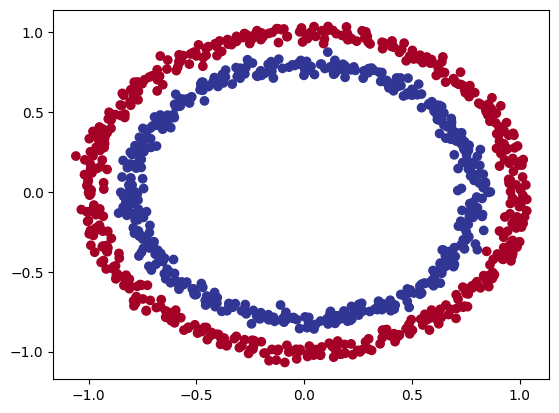

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

⚒️ Exercise: play and spend around 10 minutes on [playground_TensorFlow](https://playground.tensorflow.org)

## Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf

# . Set the random seed
tf.random.set_seed(42);

# 1. Compile the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"] # out of 100 how many our model got right, what percentage %, very simple
                )

# 3. Fit the model
model_1.fit(X, y, epochs=5)




Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.9943 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7594 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4980


In [ ]:
# let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)


In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're  working on binary classificaition problem and our model is getting around - 50% accuracy... it's performing as it is guessing.

So, let's step things up a notch and add an extra layer.

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932170987129211, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model:

1. Create a model - we might want to add more layers or increase
2. Compiling a model - we might want to use different optimizimer function
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)



In [ ]:
# 4. Evalute the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 15ms/step - loss: 0.6963 - accuracy: 0.5130


[0.6963187456130981, 0.5130000114440918]

🔑 Note: Whenever your model is performing strangely or there's something going on with your data, you'renot quite sure of rememeber these  three words:
**Visualize, Visualize, Visualize**.
Inspect your data, your model, inspect your model's predictions

To visualize our model's predictions let's create a function `plot_decision_boundary()`, this function will

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrids
* Plot the predictions as well as line between zones(where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  This function was inspired by two resources
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                       np.linspace(y_min, y_max, 100))
  # print("xx: ",xx)
  # print("yy:", yy)

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together
  # print("x_in: ", x_in)

  # Make predictions
  y_pred = model.predict(x_in)
  print("y_pred: ", y_pred)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



3125/3125 [==============================] - 4s 1ms/step
doing binary classification


<ipython-input-22-b7c88e81acda>:29: UserWarning: The following kwargs were not used by contour: 'aplpha'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, aplpha = 0.7)


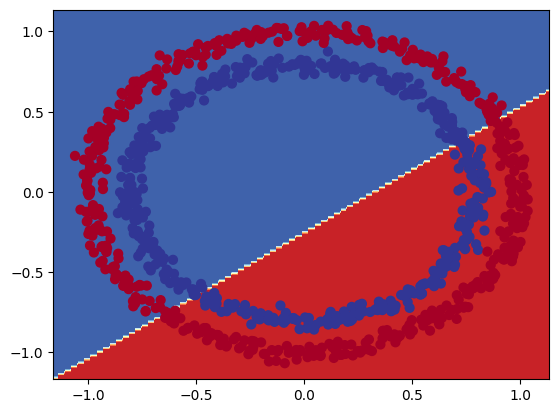

In [ ]:
plot_decision_boundary(model=model_3,
                       X = X,
                       y = y )

In [ ]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data inot training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compile our model for a binary classification
problem.

But... we're now working on a regression problem, let's change the model to suit our data.


In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 361.3300 - mae: 361.3300
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 238.3803 - mae: 238.3803
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 118.1998 - mae: 118.1998
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 51.3771 - mae: 51.3771
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 81.7909 - mae: 81.7909
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 65.9743 - mae: 65.9743
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 43.4072 - mae: 43.4072
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 50.5845 - mae: 50.5845
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 41.9961 - mae: 41.9961
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 45.0276 - mae: 45.0276
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 10ms/step


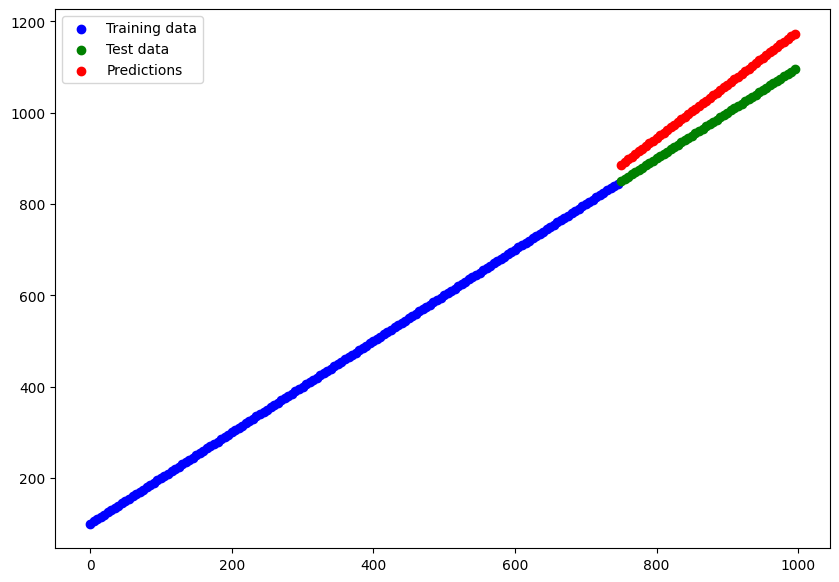

In [ ]:
# Make prediciton with our training data
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediciton against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3467 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2704 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1442 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0740 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9531 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7709 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7034 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5985 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5507 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5286 - accuracy: 0.4720
Epoch 11/

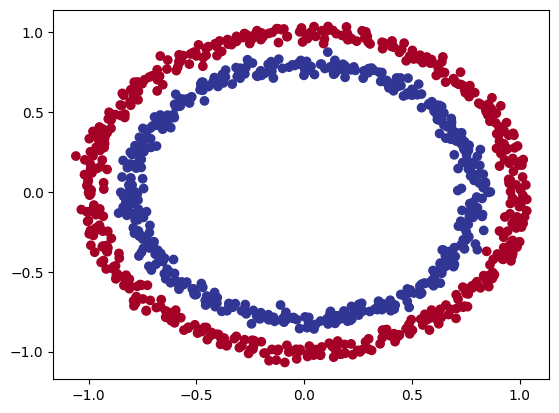

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

xx:  [[-1.15950246 -1.15720695 -1.15491144 ...  1.12912073  1.13141624
   1.13371175]
 [-1.15950246 -1.15720695 -1.15491144 ...  1.12912073  1.13141624
   1.13371175]
 [-1.15950246 -1.15720695 -1.15491144 ...  1.12912073  1.13141624
   1.13371175]
 ...
 [-1.15950246 -1.15720695 -1.15491144 ...  1.12912073  1.13141624
   1.13371175]
 [-1.15950246 -1.15720695 -1.15491144 ...  1.12912073  1.13141624
   1.13371175]
 [-1.15950246 -1.15720695 -1.15491144 ...  1.12912073  1.13141624
   1.13371175]]
yy: [[-1.16776832 -1.16776832 -1.16776832 ... -1.16776832 -1.16776832
  -1.16776832]
 [-1.14449789 -1.14449789 -1.14449789 ... -1.14449789 -1.14449789
  -1.14449789]
 [-1.12122747 -1.12122747 -1.12122747 ... -1.12122747 -1.12122747
  -1.12122747]
 ...
 [ 1.08946283  1.08946283  1.08946283 ...  1.08946283  1.08946283
   1.08946283]
 [ 1.11273325  1.11273325  1.11273325 ...  1.11273325  1.11273325
   1.11273325]
 [ 1.13600368  1.13600368  1.13600368 ...  1.13600368  1.13600368
   1.13600368]]
x_in:  

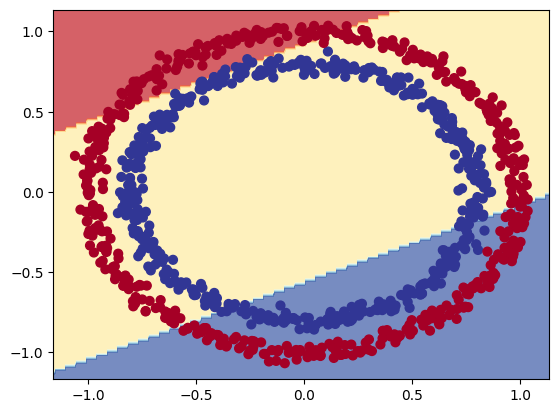

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 5.6774 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6088 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5722 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5355 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 5.4820 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 5.4347 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 5.4138 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 5.3405 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.2635 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 4.9764 - accuracy: 0.4820
Epoch 11/

In [ ]:
# TIme to replicate the multi-layer neural network from TensorFlow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # we want our output to be red or blue 2 option not 4 option, so we need ot add extra like below
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

3125/3125 [==============================] - 5s 1ms/step
y_pred:  [[-0.47860223]
 [-0.47810787]
 [-0.47761357]
 ...
 [-1.0542163 ]
 [-1.05533   ]
 [-1.056444  ]]
doing binary classification


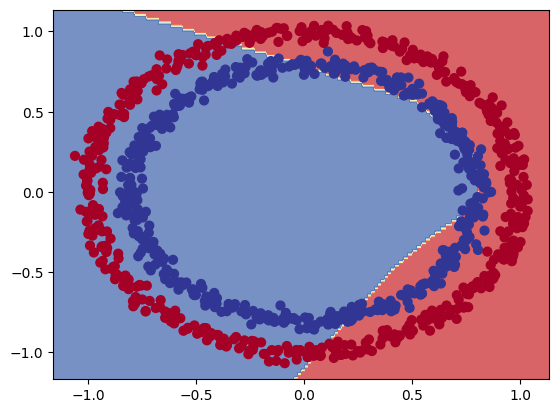

In [ ]:
# How do our model prediction look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # input activation = relu
    tf.keras.layers.Dense(4, activation="relu"), # input activation = relu
    tf.keras.layers.Dense(1, activation= "sigmoid") # for output activation we use sigmoid for binary classification
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7187 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5230
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5310
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5350
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5590
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5970
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6140
Epoch 11/

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.1916 - accuracy: 0.9920


[0.19157595932483673, 0.9919999837875366]

3125/3125 [==============================] - 6s 2ms/step
y_pred:  [[4.1797279e-08]
 [4.3579167e-08]
 [4.5436849e-08]
 ...
 [3.8073071e-05]
 [3.6524350e-05]
 [3.5038687e-05]]
doing binary classification


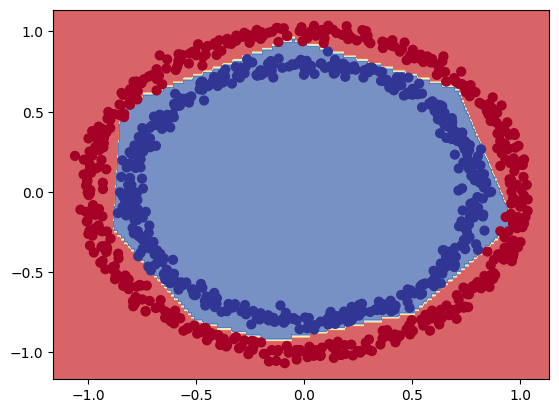

In [ ]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what did we predict on?

🔑 **Note** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions(or lines),let's see them in aciton.

In [ ]:
# Create a toy tensor (similar to the data we passed into our model)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

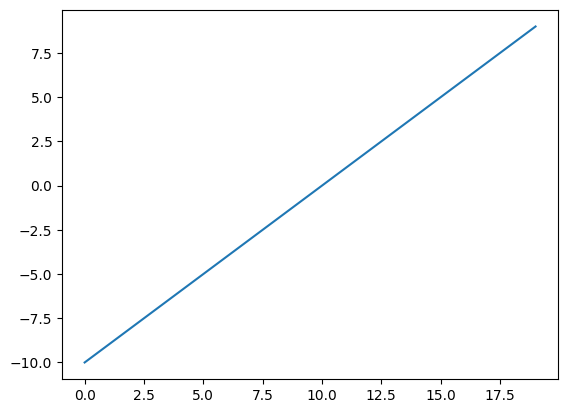

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid funciton on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

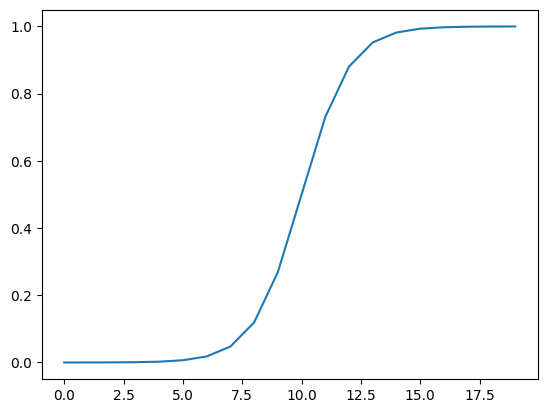

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

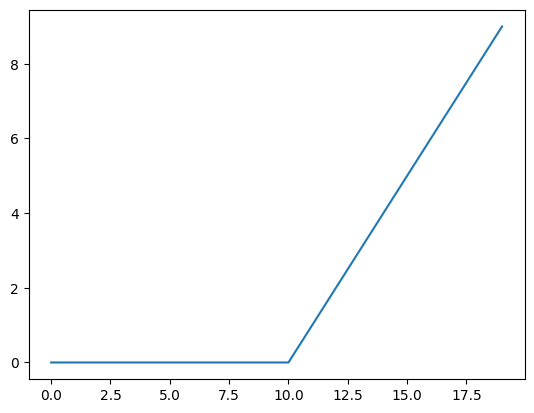

In [ ]:
# Plot RELU-modified tensor
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

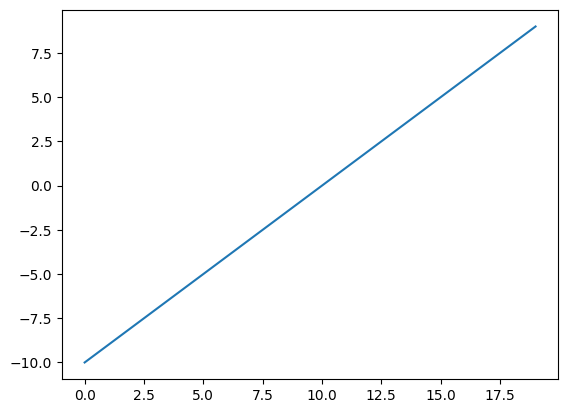

In [ ]:
# Does the linear activation function change anything ?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even changes after linear activations?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification